In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import time

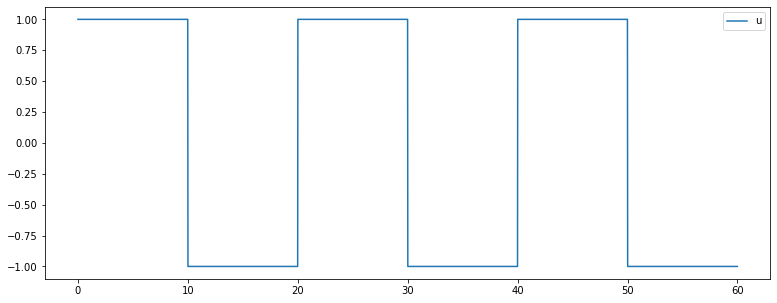

In [2]:
t = np.arange(0,60,0.01)

# smooth input
# u = np.sin(t) + np.cos(t*2)-1

# blocky input
u = signal.square(2 * np.pi *0.05 * t)

# plot the input
plt.figure(figsize=(13,5))
plt.plot(t, u, label = "u")
plt.legend()

### Simulate for output

In [3]:
tau_actaul = 0.4
K_actaul = 1.5
theta_actaul = 1

add_noise = True

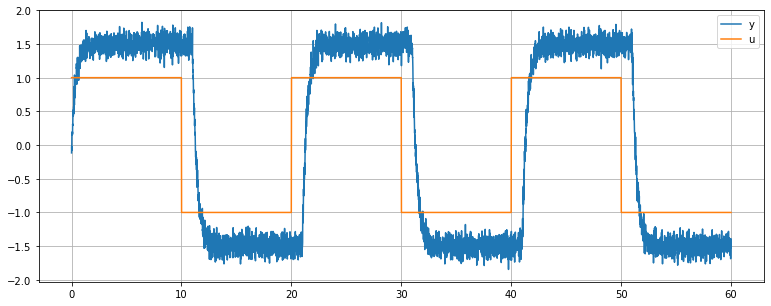

In [4]:
from scipy import signal

# delay the input
u_delay = np.interp(t - theta_actaul,t,u)

# add the process noise
if add_noise:
    u_delay += np.random.randn(u_delay.shape[0])*0.01

# pass through first order system
tf = signal.TransferFunction([K_actaul], [tau_actaul, 1])
T, y, xout = signal.lsim(tf, u_delay, t, X0 =0)

# add the measurement noise
if add_noise:
    y += np.random.randn(y.shape[0])*0.1
    
# plot the output
plt.figure(figsize=(13,5))
plt.plot(t, y, label = "y")
plt.plot(t, u, label = "u")
plt.legend()
plt.grid()
plt.show()

### Preprocessing

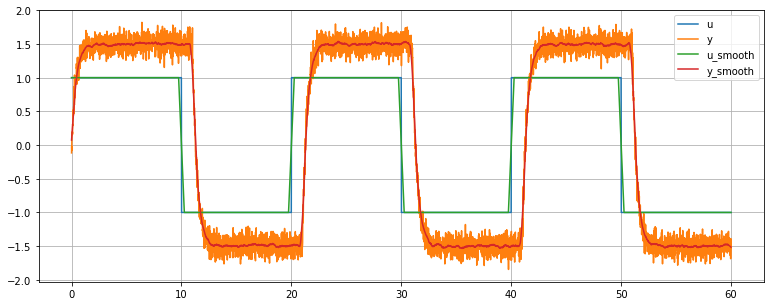

In [5]:
#smooth input u and output y
from scipy import signal
u_smooth = signal.savgol_filter(u, 51, 1)
y_smooth = signal.savgol_filter(y, 51, 1)

# u_smooth = u
# y_smooth = y

plt.figure(figsize=(13,5))
plt.plot(t, u, label = "u")
plt.plot(t, y, label = "y")
plt.plot(t, u_smooth, label = "u_smooth")
plt.plot(t, y_smooth, label = "y_smooth")
plt.legend()
plt.grid()
plt.show()



### Solve system

In [6]:
import FOPDT_fitter

tau_0 = 1
K_0 = 0.5
theta_0 = 0

tau, K, theta = FOPDT_fitter.fit_model(tau_0, K_0, theta_0, u_smooth, y_smooth, t, c=0.5, verbose=True)

Iteration 0: S = 0.50101, tau = 1.00000, K = 0.50000, theta = 0.00000, alpha = -1.00000
Iteration 1: S = 0.14221, tau = 2.06139, K = 1.75122, theta = 0.36553, alpha = 1.00000
Iteration 2: S = 0.08852, tau = 1.21622, K = 1.60771, theta = 0.74676, alpha = 1.00000
Iteration 3: S = 0.05321, tau = 0.76816, K = 1.54368, theta = 0.91737, alpha = 0.50000
Iteration 4: S = 0.03300, tau = 0.55259, K = 1.51641, theta = 0.97110, alpha = 0.50000
Iteration 5: S = 0.02605, tau = 0.47377, K = 1.50678, theta = 0.98342, alpha = 0.50000
Iteration 6: S = 0.02354, tau = 0.41329, K = 1.49944, theta = 0.99165, alpha = 1.00000
Iteration 7: S = 0.02354, tau = 0.41311, K = 1.49944, theta = 0.99071, alpha = 1.00000
Iteration 8: S = 0.02354, tau = 0.41311, K = 1.49944, theta = 0.99071, alpha = 0.00000

Solution: tau = 0.41311, K = 1.49944, theta = 0.99071
Total time taken: 0.03263 seconds


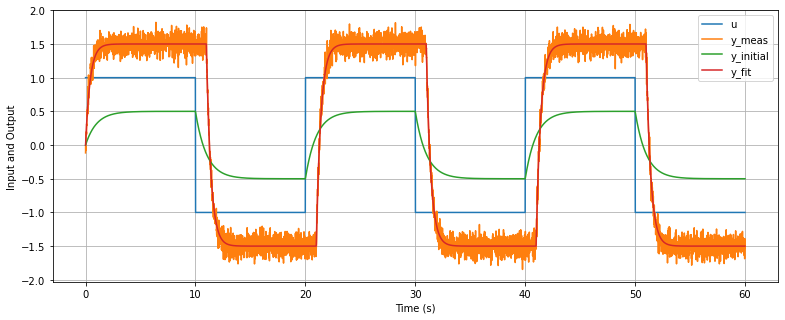

In [7]:
from scipy import signal

# delay the input


# pass through first order system
tf = signal.TransferFunction([K_0], [tau_0, 1])
u_delay = np.interp(t - theta_0,t,u)
T, y_initial, xout = signal.lsim(tf, u_delay, t, X0 =0)
    
# pass through first order system
tf = signal.TransferFunction([K], [tau, 1])
u_delay = np.interp(t - theta,t,u)
T, y_sim, xout = signal.lsim(tf, u_delay, t, X0 =0)

# plot the output
plt.figure(figsize=(13,5))
plt.plot(t, u, label = "u")
plt.plot(t, y, label = "y_meas")
plt.plot(t, y_initial, label = "y_initial")
plt.plot(t, y_sim, label = "y_fit")
plt.grid()
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Input and Output")
plt.savefig("example.png",dpi = 150)
# plt.show()